<a href="https://colab.research.google.com/github/FabioMMaia/bayesian_inference/blob/main/Bayes_General.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# Distribuições

## Bernoulli

In [87]:
from scipy.stats import bernoulli

b = bernoulli(p=.6)
b.pmf(k=1)

b.rvs(size=10)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

## Binomial

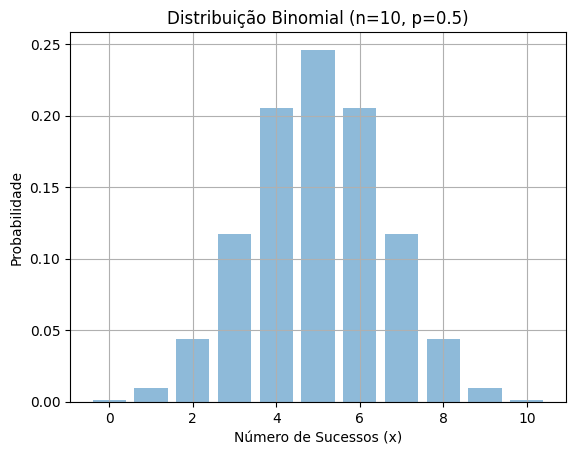

In [9]:
from scipy.stats import binom


def binomial_pmf(x, n, p):
    return binom.pmf(x, n, p)

n = 10  # Número de tentativas
p = 0.5  # Probabilidade de sucesso
x = np.arange(0, n+1)  # Valores de x de 0 a n

pmf = binomial_pmf(x, n, p)

plt.bar(x, pmf, align='center', alpha=0.5)
plt.xlabel("Número de Sucessos (x)")
plt.ylabel("Probabilidade")
plt.title(f"Distribuição Binomial (n={n}, p={p})")
plt.grid(True)
plt.show()

## Exponencial

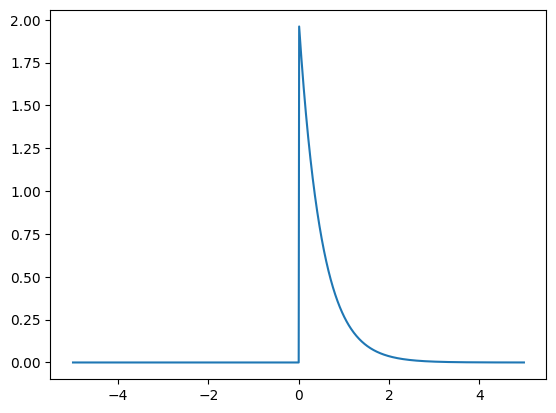

In [10]:
def exp(x, lmbd):
  if x>=0:
    return lmbd*np.e**(-lmbd*x)
  else:
    return 0


lmbd = 2
ts = np.arange(-5,5, 0.01)
y = [exp(t, lmbd) for t in ts]

plt.plot(ts, y)

## Gamma

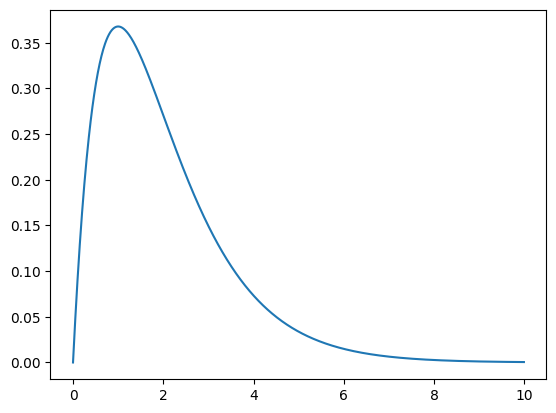

In [11]:
import scipy.stats as stats

alpha = 2  # Parâmetro alfa (shape k é alfa)
beta = 1  # Parâmetro beta (scale theta é 1/beta)
ts = np.arange(0,10, 0.01) # gamma tem suporte para x>0
pdf = stats.gamma.pdf(ts, alpha, scale=1/beta)  # Calcula a PDF da distribuição gama

plt.plot(ts, pdf)

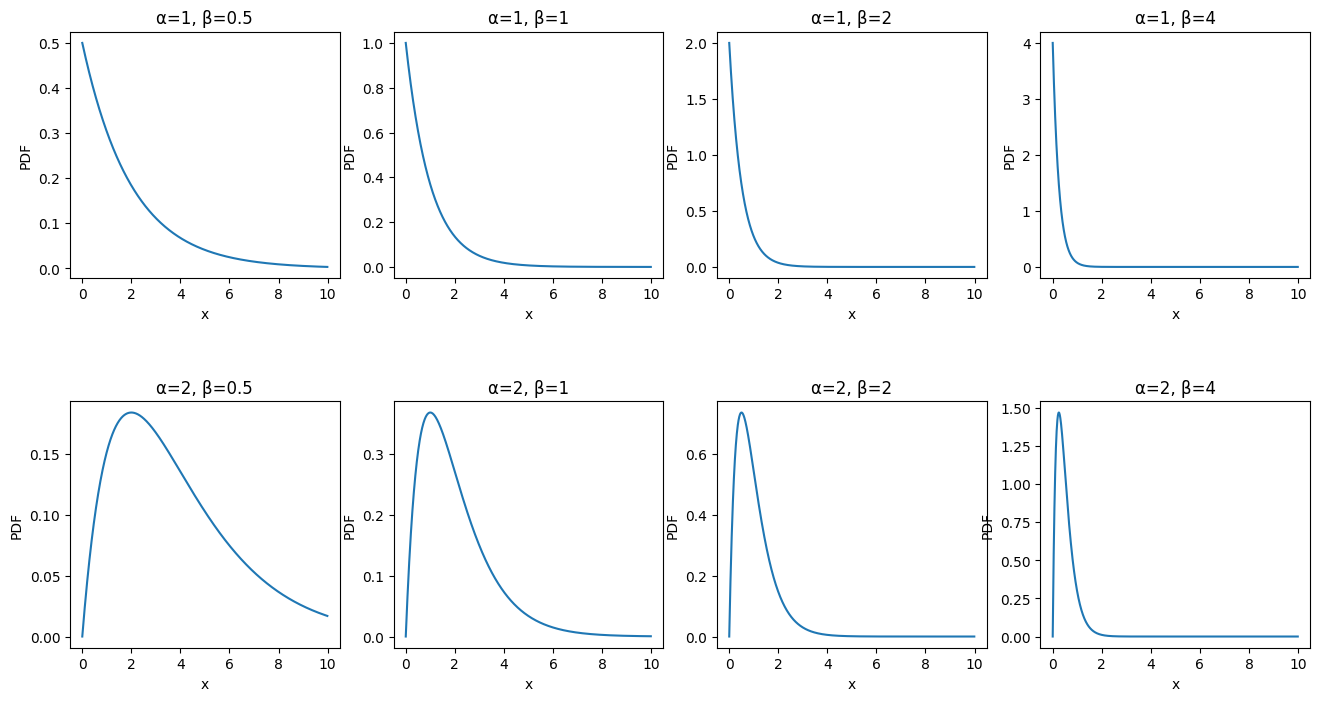

In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Valores de alpha (alfa) e beta (beta)
alphas = [1, 2, 3, 4]
betas = [0.5, 1, 2, 4]

# Cria uma matriz de gráficos 2x4
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for (alpha, beta), ax in zip([(alpha, beta) for alpha in alphas for beta in betas], axs.ravel()):
    ts = np.arange(0, 10, 0.01)
    pdf = stats.gamma.pdf(ts, alpha, scale=1/beta)
    ax.plot(ts, pdf)
    ax.set_title(f'α={alpha}, β={beta}')
    ax.set_xlabel('x')
    ax.set_ylabel('PDF')

plt.show()


## Beta

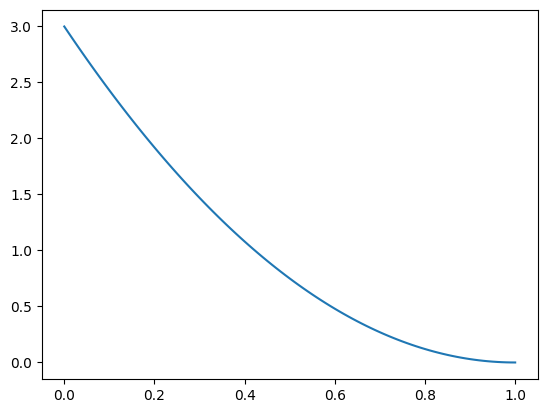

In [13]:
alpha = 1  # Parâmetro alfa
beta = 3  # Parâmetro beta
ts = np.arange(0,1.01, 0.01) # gamma tem suporte para x>0
pdf = stats.beta.pdf(ts,alpha, beta)  # Calcula a PDF da distribuição gama

plt.plot(ts, pdf)

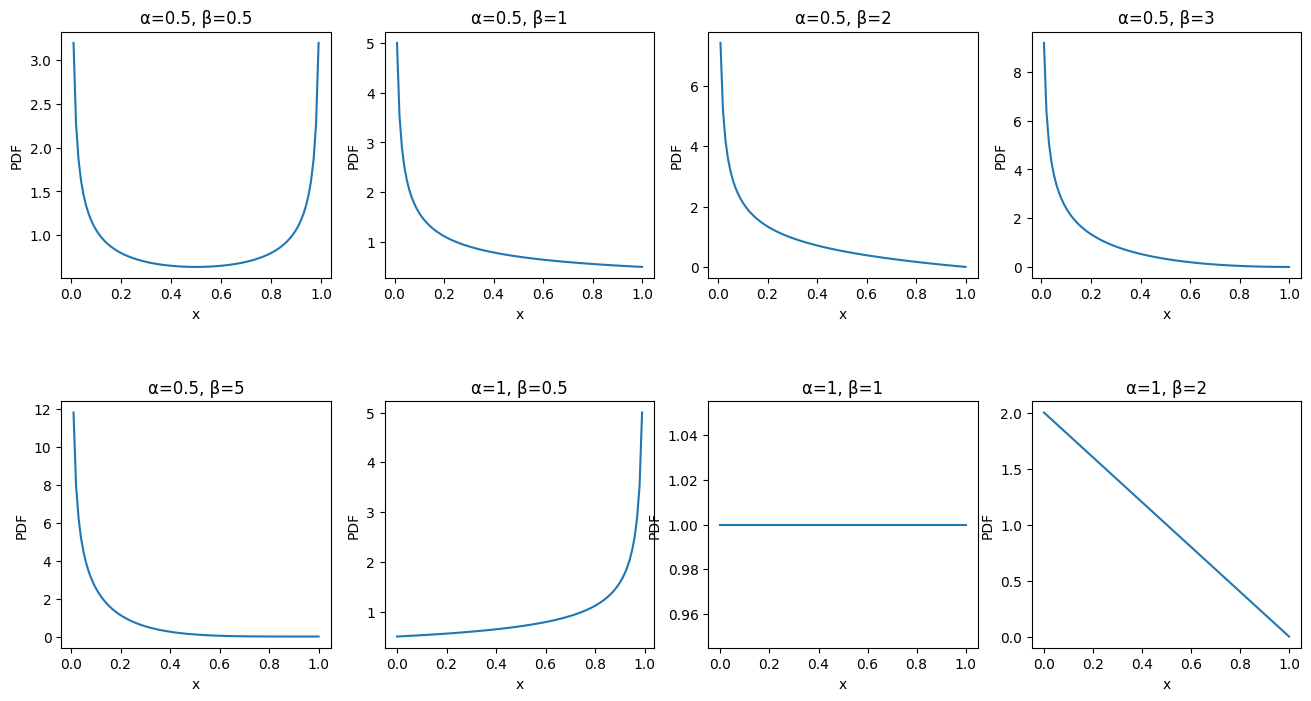

In [14]:
# Valores de alpha (alfa) e beta (beta)
alphas = [0.5,1,2,3,5]
betas = [0.5,1,2,3,5]

# Cria uma matriz de gráficos 2x4
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for (alpha, beta), ax in zip([(alpha, beta) for alpha in alphas for beta in betas], axs.ravel()):
    ts = np.arange(0, 1.01, 0.01)
    pdf = stats.beta.pdf(ts, alpha, beta)
    ax.plot(ts, pdf)
    ax.set_title(f'α={alpha}, β={beta}')
    ax.set_xlabel('x')
    ax.set_ylabel('PDF')

plt.show()


# Pareto


A distribuição de Pareto é frequentemente usada para modelar fenômenos como a distribuição de riqueza, a distribuição de tamanhos de empresas, a distribuição de palavras em textos e muitos outros casos em que eventos raros desempenham um papel crucial. Ela é uma ferramenta útil na análise de dados quando se lida com distribuições desiguais e eventos extremos.

In [21]:
import scipy.integrate as spi

alpha = 2
x_m = 10000

# Função de densidade de probabilidade da distribuição de Pareto
def pareto_pdf(x):
    return (alpha * x_m**alpha) / (x**(alpha + 1))

# Calcula a probabilidade
probability, _ = spi.quad(pareto_pdf, 15000, float('inf'))

print(f'A probabilidade de uma cidade ter tamanho maior ou igual a 15.000 é {probability:.4f}')


A probabilidade de uma cidade ter tamanho maior ou igual a 15.000 é 0.4444


In [40]:
from scipy.stats import pareto

alpha = 2  # Parâmetro de forma
x_m = 10000  # Valor mínimo desejado

# Criando uma distribuição de Pareto com valor diferente de x_m
pareto = stats.pareto(b=alpha, scale=x_m)

print('Se alpha é 2')
print('Probabilidade de uma cidade ter tamanho maior ou igual a 25.000 é ',1-pareto.cdf(x=25_000))
print('Probabilidade de uma cidade ter tamanho maior ou igual a 15.000 é ',1-pareto.cdf(x=15000))
print('Probabilidade de uma cidade ter tamanho maior ou igual a 5.000 é ',1-pareto.cdf(x=5000))
print('Probabilidade de uma cidade ter tamanho maior ou igual a 1.000 é ',1-pareto.cdf(x=1000))

alpha = 10  # Parâmetro de forma
pareto = stats.pareto(b=alpha, scale=x_m)

print('Se alpha é 10')
print('Probabilidade de uma cidade ter tamanho maior ou igual a 25.000 é ',1-pareto.cdf(x=25_000))
print('Probabilidade de uma cidade ter tamanho maior ou igual a 15.000 é ',1-pareto.cdf(x=15000))
print('Probabilidade de uma cidade ter tamanho maior ou igual a 5.000 é ',1-pareto.cdf(x=5000))
print('Probabilidade de uma cidade ter tamanho maior ou igual a 1.000 é ',1-pareto.cdf(x=1000))

Se alpha é 2
Probabilidade de uma cidade ter tamanho maior ou igual a 25.000 é  0.16000000000000003
Probabilidade de uma cidade ter tamanho maior ou igual a 15.000 é  0.4444444444444444
Probabilidade de uma cidade ter tamanho maior ou igual a 5.000 é  1.0
Probabilidade de uma cidade ter tamanho maior ou igual a 1.000 é  1.0
Se alpha é 10
Probabilidade de uma cidade ter tamanho maior ou igual a 25.000 é  0.00010485760000000788
Probabilidade de uma cidade ter tamanho maior ou igual a 15.000 é  0.0173415299158326
Probabilidade de uma cidade ter tamanho maior ou igual a 5.000 é  1.0
Probabilidade de uma cidade ter tamanho maior ou igual a 1.000 é  1.0


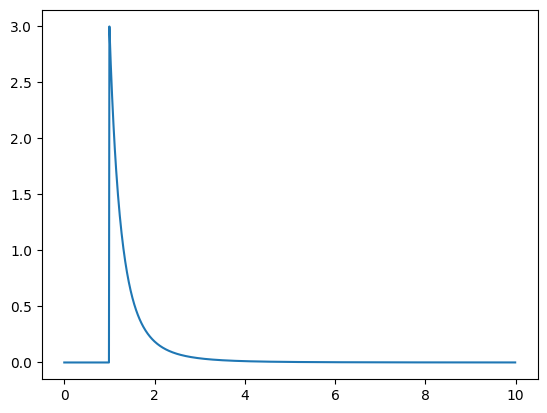

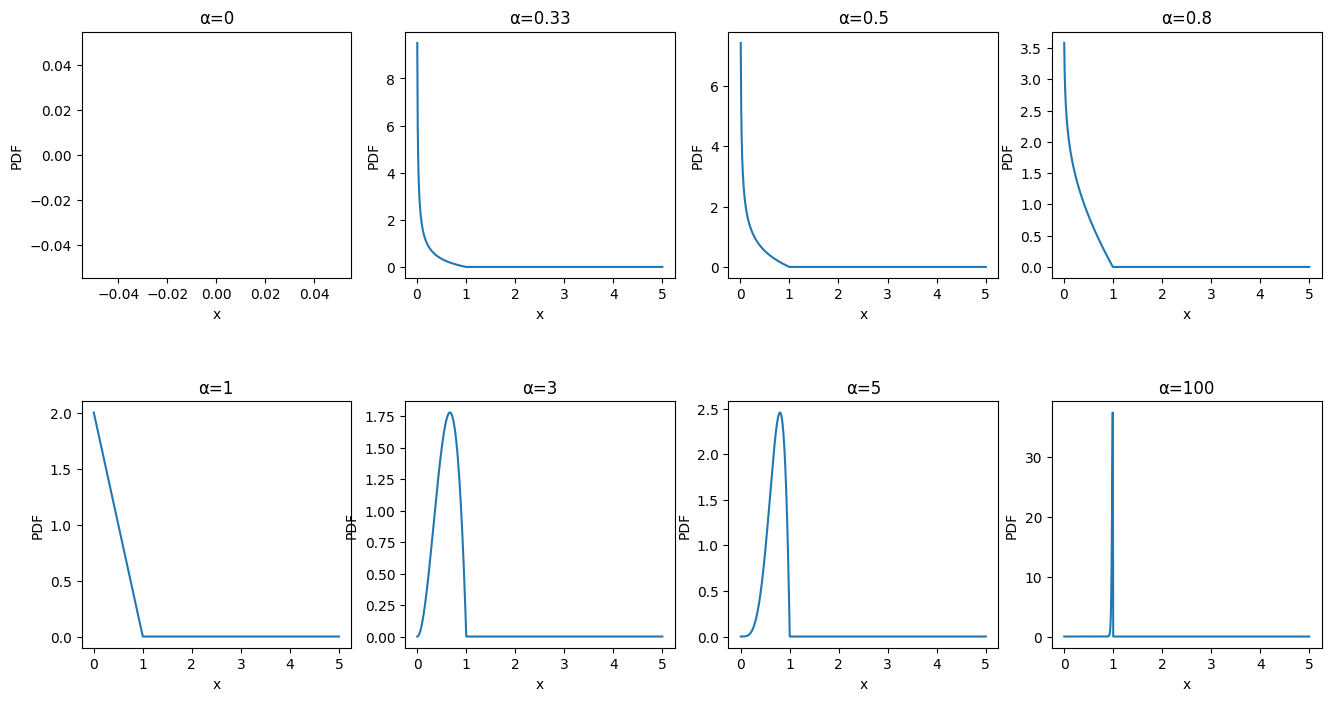

In [28]:
alpha = 3  # Parâmetro alfa
ts = np.arange(0,10, 0.01) # gamma tem suporte para x>0
pdf = stats.pareto.pdf(ts, alpha)  # Calcula a PDF da distribuição gama

plt.plot(ts, pdf)

# Valores de alpha (alfa) e beta (beta)
alphas = [0,0.33, 0.5, 0.8, 1,3,5, 100]

# Cria uma matriz de gráficos 2x4
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for alpha, ax in zip(alphas, axs.ravel()):
    ts = np.arange(0, 5.01, 0.01)
    pdf = stats.beta.pdf(ts, alpha, beta)
    ax.plot(ts, pdf)
    ax.set_title(f'α={alpha}')
    ax.set_xlabel('x')
    ax.set_ylabel('PDF')

plt.show()


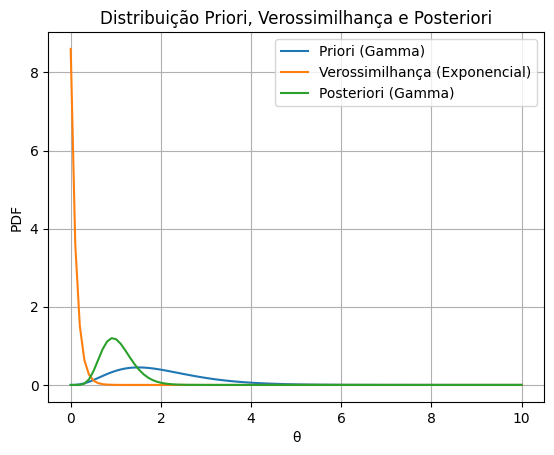

In [ ]:

# Prova II


# Dados observados (simulados para fins de exemplo)
data = np.array([0.5, 1.2, 0.8, 2.5, 1.6])

# Informação prévia (média desejada)
prior_mean = 2.0

# Parâmetros da distribuição gama (priori)
a = prior_mean ** 2  # Escolha de 'a' baseada na média desejada
b = a / prior_mean  # 'b' é definido para que a média seja igual a 2

# Distribuição priori (gama)
prior_distribution = stats.gamma(a=a, scale=1/b)

# Cálculo da posteriori
posterior_a = a + len(data)  # Atualiza 'a' com base nos dados
posterior_b = b + sum(data)  # Atualiza 'b' com base nos dados

# Distribuição posteriori (gama)
posterior_distribution = stats.gamma(a=posterior_a, scale=1/posterior_b)

# Plota a priori, verossimilhança e posteriori no mesmo gráfico
x = np.linspace(0, 10, 100)
plt.plot(x, prior_distribution.pdf(x), label='Priori (Gamma)')
plt.plot(x, stats.expon.pdf(x, scale=1/posterior_b), label='Verossimilhança (Exponencial)')
plt.plot(x, posterior_distribution.pdf(x), label='Posteriori (Gamma)')
plt.xlabel('θ')
plt.ylabel('PDF')
plt.title('Distribuição Priori, Verossimilhança e Posteriori')
plt.legend()
plt.grid()

plt.show()


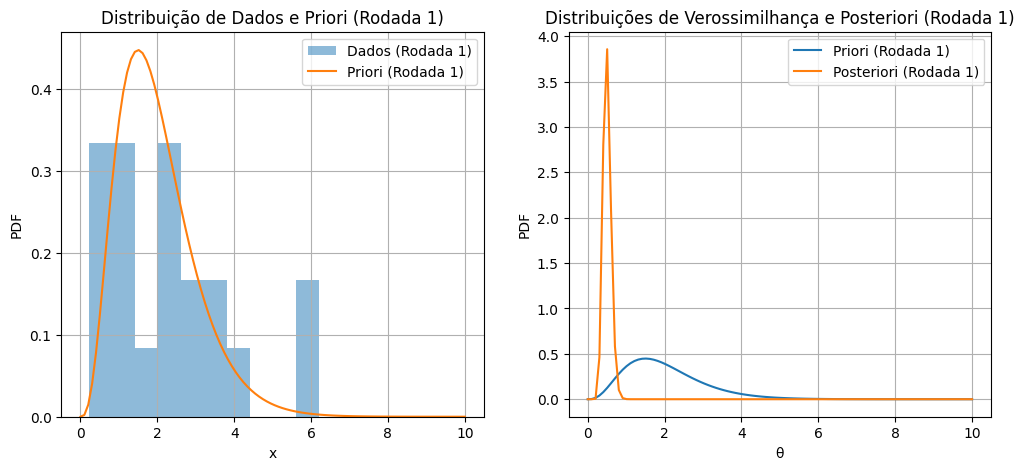

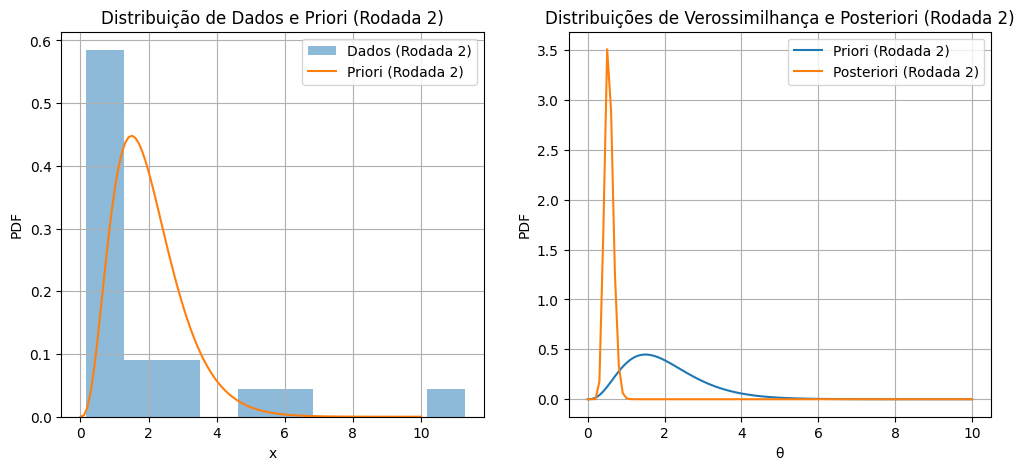

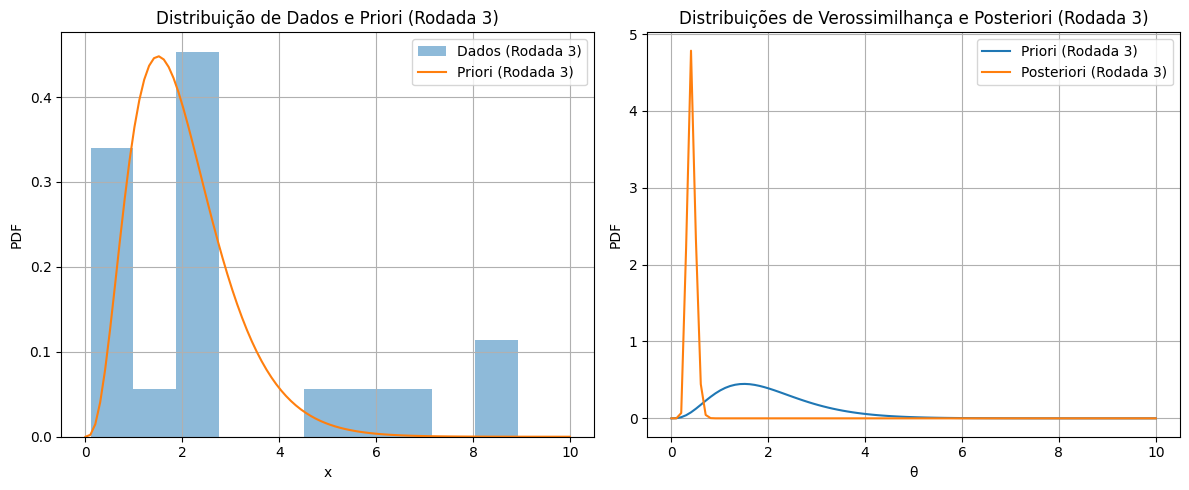

[array([2.66969138, 3.65182485, 0.79195126, 1.03295329, 3.84250948,
       2.50965203, 3.27445405, 2.69369945, 0.21816136, 0.67574191,
       6.05957947, 1.13180084, 2.05915593, 6.19809301, 0.59479569,
       2.37439241, 2.27056728, 0.84761433, 1.76766495, 0.99914701]), array([ 2.48648813,  0.84493788,  0.86370617,  1.5894376 ,  1.21360078,
        0.67909564,  0.86669794,  0.27906924,  0.82165859,  0.16685452,
        0.74628794,  0.62525137,  1.65865184,  0.90583834,  1.15431595,
        6.38767783,  1.12057191, 11.28448603,  3.0415169 ,  4.68077673]), array([1.1098088 , 2.29737756, 2.52061781, 0.10591346, 5.52960482,
       1.93999778, 8.92533665, 2.40144385, 6.75742176, 2.43238255,
       0.69861602, 8.6229959 , 0.37057917, 1.96167693, 0.14302184,
       1.94049244, 4.77852218, 1.93973557, 0.70660325, 0.735209  ])]


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Tamanho dos dados em cada rodada
n = 20

# Número de rodadas
num_rounds = 3

# Informação prévia (média desejada)
prior_mean = 2.0

# Inicialização das listas para armazenar os resultados
data_sets = []
priori_distributions = []
posteriori_distributions = []
likelihood_distributions = []

for _ in range(num_rounds):
    # Gerar dados observados a partir de uma distribuição exponencial
    data = np.random.exponential(scale=prior_mean, size=n)
    data_sets.append(data)

    # Parâmetros da distribuição gama (priori)
    a = prior_mean ** 2
    b = a / prior_mean

    # Distribuição priori (gama)
    prior_distribution = stats.gamma(a=a, scale=1/b)
    priori_distributions.append(prior_distribution)

    # Cálculo da posteriori
    posterior_a = a + n
    posterior_b = b + np.sum(data)

    # Distribuição posteriori (gama)
    posterior_distribution = stats.gamma(a=posterior_a, scale=1/posterior_b)
    posteriori_distributions.append(posterior_distribution)

    # Distribuição de verossimilhança (exponencial)
    likelihood_distribution = stats.expon(scale=1/posterior_b)
    likelihood_distributions.append(likelihood_distribution)

# Plota os dados e as distribuições a priori, de verossimilhança e posteriori em cada rodada
x = np.linspace(0, 10, 100)
for i in range(num_rounds):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(data_sets[i], bins=10, density=True, alpha=0.5, label='Dados (Rodada ' + str(i + 1) + ')')
    plt.plot(x, priori_distributions[i].pdf(x), label=f'Priori (Rodada {i + 1})')
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.title(f'Distribuição de Dados e Priori (Rodada {i + 1})')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(x, priori_distributions[i].pdf(x), label=f'Priori (Rodada {i + 1})')
    # plt.plot(x, likelihood_distributions[i].pdf(x), label=f'Verossimilhança (Rodada {i + 1})', linestyle='--')
    plt.plot(x, posteriori_distributions[i].pdf(x), label=f'Posteriori (Rodada {i + 1})')
    plt.xlabel('θ')
    plt.ylabel('PDF')
    plt.title(f'Distribuições de Verossimilhança e Posteriori (Rodada {i + 1})')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()
print(data_sets)

Elicitação de parâmetros

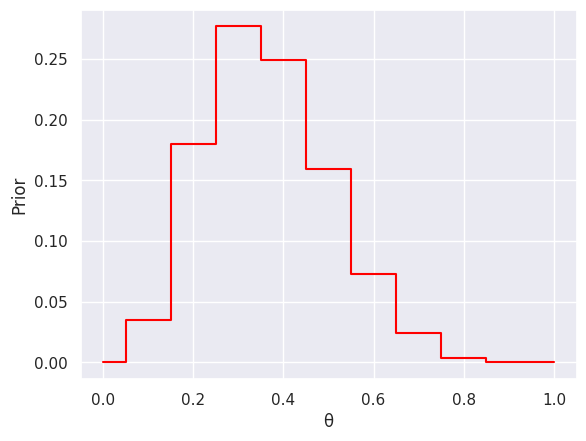

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Exemplo - pesos dado pelo especialista
p = np.array([1, 5.2, 8, 7.2, 4.6, 2.1, 0.7, 0.1, 0, 0])
prior = np.concatenate(([0], p / np.sum(p))) # A soma dos pesos tem que dar 1

theta = np.arange(0, 1.1, 0.1)

plt.step(theta, prior, where="mid", color="red", linewidth=1.5)
plt.xlabel("θ")
plt.ylabel("Prior")
plt.show()


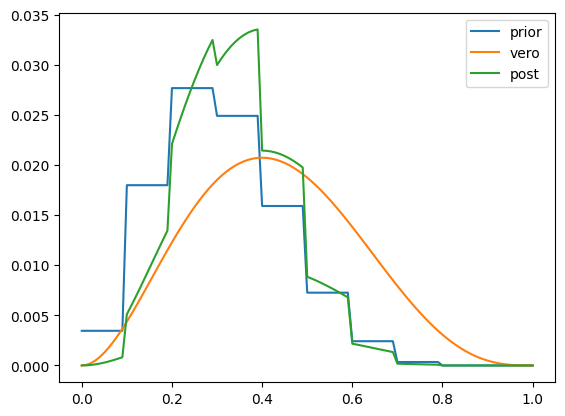

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Considerando metodo do histograma (pesos subjetivos) como priori, e verossimilhança como binomial (lançamento de n moedas) com parametro theta

# Dados do exemplo
n = 5
x = 2
p = np.array([1, 5.2, 8, 7.2, 4.6, 2.1, 0.7, 0.1, 0, 0])
p = p / np.sum(p)
theta = np.arange(0, 1.01, 0.01)

# Cálculo das distribuições
prior = np.concatenate([np.repeat(p, 10), [0]]) / np.sum(np.concatenate([np.repeat(p, 10), [0]]))
vero = binom.pmf(x, n, theta)/binom.pmf(x, n, theta).sum()
post = (prior * vero) / np.sum(prior * vero)

# Cria um DataFrame com os resultados
data = pd.DataFrame({'theta': np.tile(theta, 3), 'dens': np.concatenate([prior, vero, post]), 'Dist': np.tile(['1.priori', '2.verossimilhança', '3.posteriori'], 101)})

# Plota as distribuições
plt.plot(theta, prior, label= 'prior')
plt.plot(theta, vero, label= 'vero')
plt.plot(theta , post, label= 'post')
plt.legend()
plt.show()


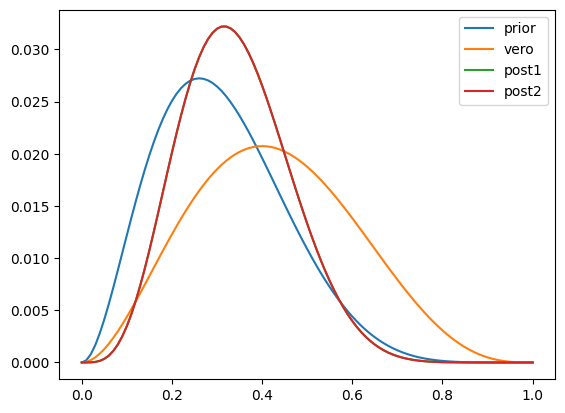

In [ ]:
# Considerando beta como priori, e verossimilhança como binomial (lançamento de n moedas) com parametro theta. Ao inves do histograma usa-se a média m e desvio padrao v
n=5; x=2
m=0.31
v=0.02
a=m*(m-m**2-v)/v
b=(1-m)*(m-m**2-v)/v

p = np.array([1, 5.2, 8, 7.2, 4.6, 2.1, 0.7, 0.1, 0, 0])
p = p / np.sum(p)
theta = np.arange(0, 1.01, 0.01)

# Cálculo das distribuições
prior = stats.beta.pdf(theta, a, b)/ stats.beta.pdf(theta, a, b).sum()
vero = binom.pmf(x, n, theta)/binom.pmf(x, n, theta).sum()
post1 = (prior * vero) / np.sum(prior * vero)
post2 = stats.beta.pdf(theta, a+ x, b+n-x)/ stats.beta.pdf(theta, a+ x, b+n-x).sum()

# Cria um DataFrame com os resultados
data = pd.DataFrame({'theta': np.tile(theta, 3), 'dens': np.concatenate([prior, vero, post]), 'Dist': np.tile(['1.priori', '2.verossimilhança', '3.posteriori'], 101)})

# Plota as distribuições
plt.plot(theta, prior, label= 'prior')
plt.plot(theta, vero, label= 'vero')
plt.plot(theta , post1, label= 'post1')
plt.plot(theta , post2, label= 'post2')
plt.legend()
plt.show()

Probabilidade de Vermelha: 0.26
Probabilidade de Verde: 0.69
Probabilidade de Azul: 0.04


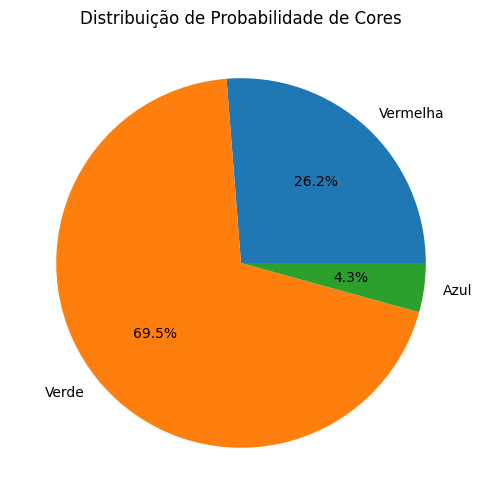

In [ ]:
# Prioris conjugadas, multinomial e dirichlet

import numpy as np
import matplotlib.pyplot as plt

# Parâmetros da distribuição de Dirichlet
alphas = [2, 3, 1]

# Gere uma amostra da distribuição de Dirichlet
sample = np.random.dirichlet(alphas, size=1)

# Resultados da amostra
colors = ['Vermelha', 'Verde', 'Azul']

for i, color in enumerate(colors):
    print(f'Probabilidade de {color}: {sample[0][i]:.2f}')

# Plot da amostra da distribuição de Dirichlet
plt.figure(figsize=(6, 6))
plt.pie(sample[0], labels=colors, autopct='%1.1f%%')
plt.title('Distribuição de Probabilidade de Cores')
plt.show()


Amostra da Distribuição Posterior Dirichlet:
[[0.25272653 0.42826792 0.31900555]]


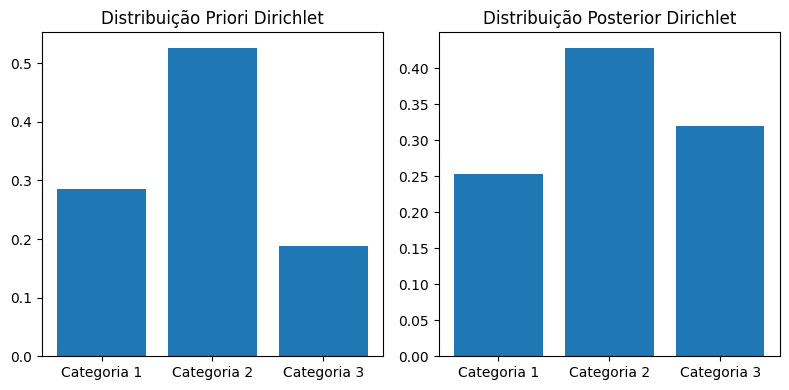

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet, multinomial

# Parâmetros da priori Dirichlet
alpha_prior = np.array([1, 1, 1])

# Amostra da priori Dirichlet
prior_sample = dirichlet.rvs(alpha_prior, size=1)

# Dados observados (contagens de categorias)
data = np.array([5, 3, 2])

# Likelihood: Verossimilhança multinomial
likelihood = multinomial.pmf(data, n=np.sum(data), p=prior_sample[0])

# Parâmetros da posteriori Dirichlet
alpha_posterior = alpha_prior + data

# Gere uma amostra da posteriori Dirichlet
posterior_sample = dirichlet.rvs(alpha_posterior, size=1)

# Resultados da amostra posterior
print("Amostra da Distribuição Posterior Dirichlet:")
print(posterior_sample)

# Plot das amostras da priori e posterior
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(range(3), prior_sample[0], tick_label=['Categoria 1', 'Categoria 2', 'Categoria 3'])
plt.title('Distribuição Priori Dirichlet')
plt.subplot(1, 2, 2)
plt.bar(range(3), posterior_sample[0], tick_label=['Categoria 1', 'Categoria 2', 'Categoria 3'])
plt.title('Distribuição Posterior Dirichlet')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from scipy.stats import dirichlet, multinomial

# Parâmetros da priori Dirichlet
alpha_prior = np.array([1, 1, 1])

# Dados observados (contagens de categorias)
data = np.array([5, 3, 2])

# Parâmetros da posteriori Dirichlet
alpha_posterior = alpha_prior + data

# Gere uma amostra da posteriori Dirichlet
posterior_sample = dirichlet.rvs(alpha_posterior, size=1)

# Resultados da amostra posterior
print("Amostra da Distribuição Posterior Dirichlet:")
print(posterior_sample)

Amostra da Distribuição Posterior Dirichlet:
[[0.30733042 0.39532413 0.29734545]]


In [ ]:
import numpy as np
from scipy.stats import dirichlet, multinomial

# Parâmetros da priori Dirichlet
alpha_prior = np.array([1, 1, 1])

# Dados observados (contagens de categorias)
data = np.array([5, 3, 2])

# Gere uma amostra a priori Dirichlet
prior_sample = dirichlet.rvs(alpha_prior, size=1)

# Cálculo das probabilidades da verossimilhança multinomial
likelihood_probabilities = multinomial.pmf(data, n=np.sum(data), p=prior_sample[0])

# Parâmetros da posteriori Dirichlet
alpha_posterior = alpha_prior + data

# Gere uma amostra da posteriori Dirichlet
posterior_sample = dirichlet.rvs(alpha_posterior, size=1)

# Resultados da amostra posterior
print("Amostra da Distribuição Posterior Dirichlet:")
print(posterior_sample)


Amostra da Distribuição Posterior Dirichlet:
[[0.40253658 0.30773344 0.28972999]]


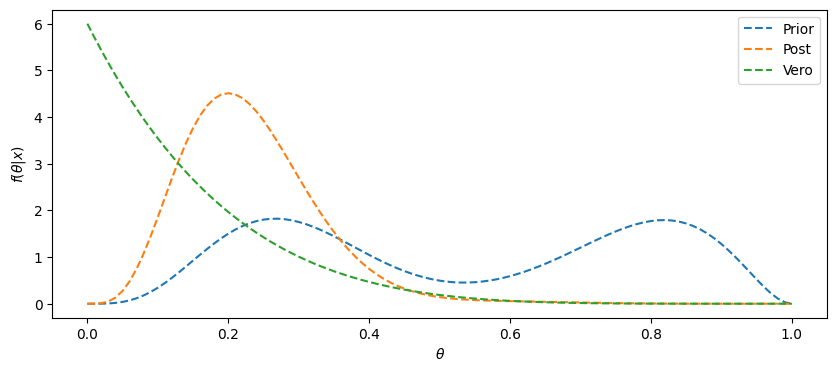

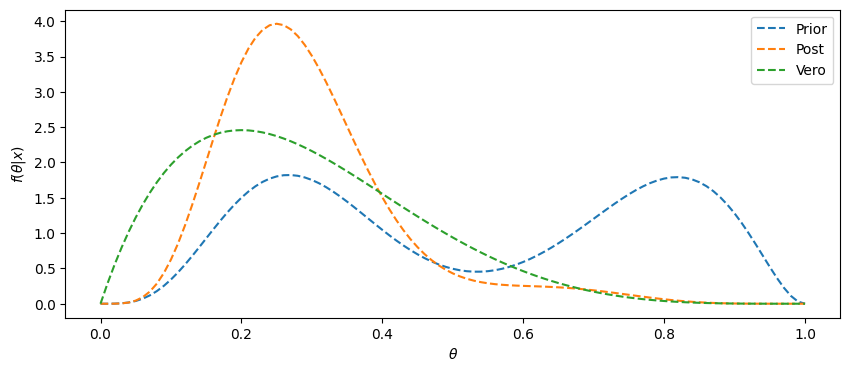

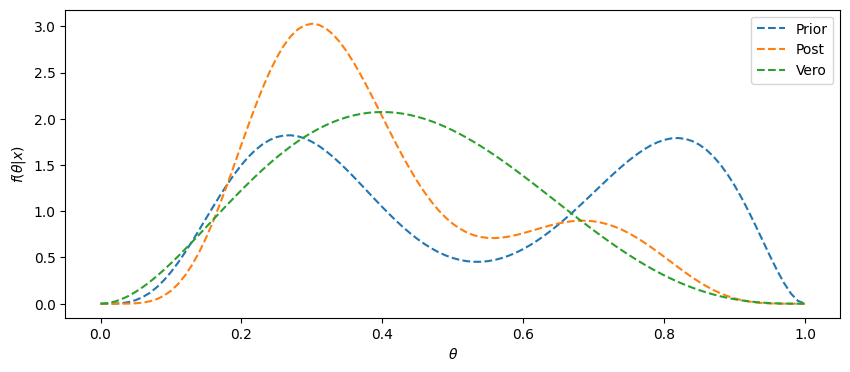

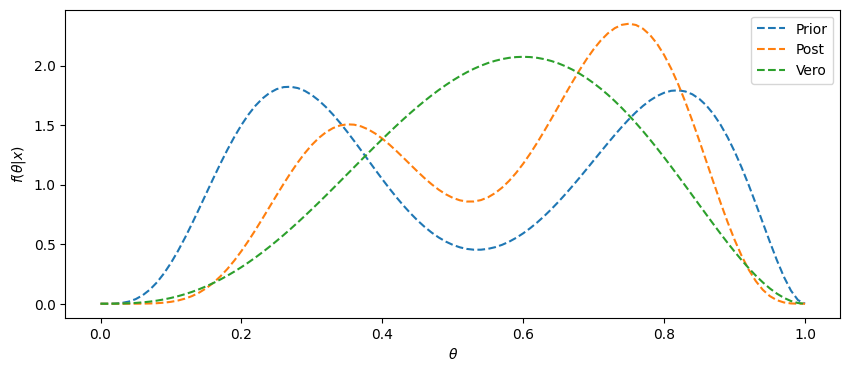

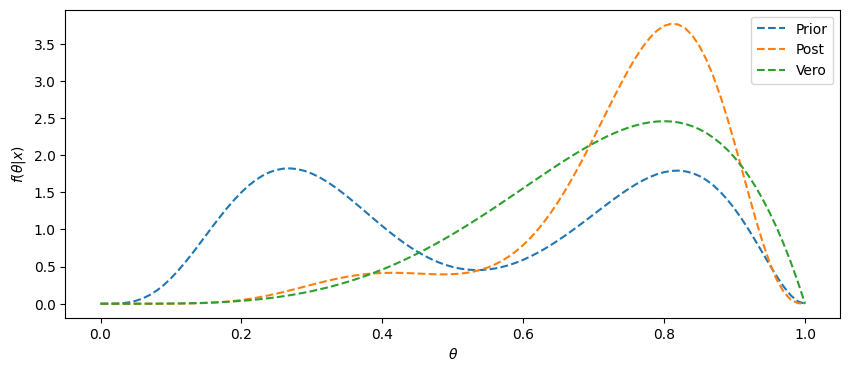

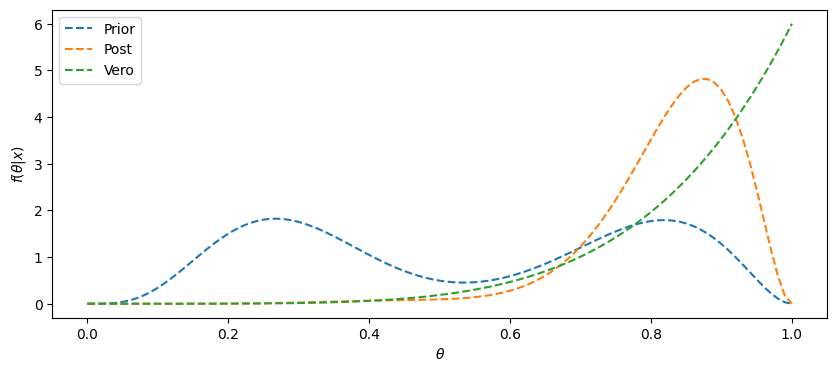

In [68]:
import numpy as np
from scipy.special import comb, gamma
from scipy.stats import beta

n = 5
w = 0.5
a1, b1 = 5, 12

theta = np.linspace(0, 1, 101)

A = np.array([(w * comb(n, x) * gamma(a1 + b1) * (gamma(a1 + x) * gamma(b1 + n - x))) / ((gamma(a1) * gamma(b1)) * gamma(a1 + b1 + n)) for x in range(n + 1)])

B = np.array([((1-w) * comb(n, x) * gamma(a2 + b2) * (gamma(a2 + x) * gamma(b2 + n - x))) / ((gamma(a2) * gamma(b2)) * gamma(a2 + b2 + n)) for x in range(n + 1)])

w2 = A/(A+B)

prior2 = np.array([w * beta.pdf(theta, a1, b1) + (1 - w) * beta.pdf(theta, a2, b2) for x in range(n + 1)])

post2 = np.array([w2 * beta.pdf(theta, a1 + x, b1 + n - x) + (1 - w2) * beta.pdf(theta, a2 + x, b2 + n - x) for x, w2 in zip(range(n + 1), w2)])

vero = np.array([beta.pdf(theta, x + 1, n - x + 1) for x in range(n + 1)])

# from scipy.stats import binom
# vero = np.array([binom.pmf(x, n, theta) for x in range(n + 1)])

for x in range(n + 1):
    plt.figure(figsize=(10, 4))

    plt.plot(theta, prior2[x], label=f'Prior', linestyle='--')
    plt.plot(theta, post2[x], label=f'Post', linestyle='--')
    plt.plot(theta, vero[x], label='Vero', linestyle='--')

    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$f(\theta|x)$')
    plt.legend()

    plt.show()


# Teorema de Definetti

In [96]:
def fat(x):
  if x==0 or x==1:
    return 1
  else:
    return x*fat(x-1)


def estat1(x,n):
  return 12/((x+2)*comb(n+4, x+2))

def estat2(x,n):
  return 1/((n+1)*comb(n, x))

# se x=14
print('proba de ser cara para a 21 primeira moeda para o estat1:',estat1(14+1, 21)/estat1(14, 20))
print('proba de ser cara para a 21 primeira moeda para o estat2:',estat2(14+1, 21)/estat2(14, 20))


proba de ser cara para a 21 primeira moeda para o estat1: 0.64
proba de ser cara para a 21 primeira moeda para o estat2: 0.6818181818181819


In [104]:
b = bernoulli(p=.6)
row = {}
i = 0

n=20
x = b.rvs(size=n).sum()
p_est1 = estat1(x+1, n + 1 )/estat1(x, n)
p_est2 = estat2(x+1, n + 1 )/estat2(x, n)
row[n] = {'n':n, 'x':x, 'p_est1': p_est1, 'p_est2': p_est2}


In [150]:
b = bernoulli(p=.8)
row = {}
i = 0

for n in range(1, 1_000):
  x = b.rvs(size=n).sum()
  p_est1 = estat1(x+1, n + 1 )/estat1(x, n)
  p_est2 = estat2(x+1, n + 1 )/estat2(x, n)
  row[n] = {'n':n, 'x':x, 'p_est1': p_est1, 'p_est2': p_est2}


In [151]:
df = pd.DataFrame(row).T

In [152]:
df.set_index('n', inplace=True)

In [153]:
df.tail(5)

,x,p_est1,p_est2
n,,,
995.0,802.0,0.804000,0.805416
996.0,804.0,0.805195,0.806613
997.0,773.0,0.773453,0.774775
998.0,807.0,0.806580,0.808000
999.0,799.0,0.797809,0.799201


<Axes: xlabel='n'>

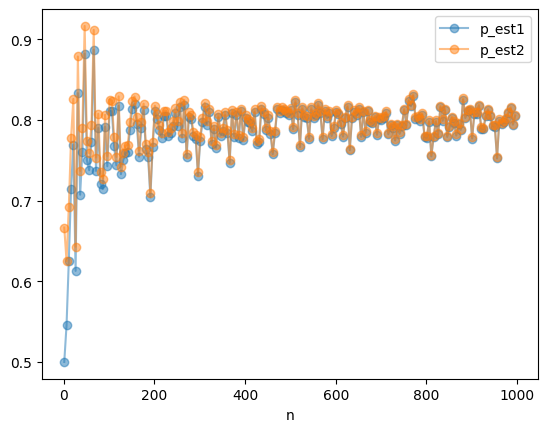

In [154]:
df[['p_est1', 'p_est2']].iloc[::5,:].plot(alpha=.5, marker='o')